# Programmatic Preamble

In [2]:
from pandas import read_csv, DataFrame, concat
import numpy
import matplotlib.pyplot as plt
from kato_bands_plot import plot_kato_bands
from reference_spectrum_plot import plot_referenced_spectra
from spectral_responsivity_plot import plot_spectral_responsivity
from effective_irradiance_plot import calculate_effective_irradiance
from effective_irradiance_plot import plot_effective_irradiance
from irradiance_plot import plot_irradiance_data
from spectral_mismatch import (
    calculate_spectral_mismatch,
    calculate_spectral_mismatch_mihaylov,
    calculate_spectral_mismatch_pvlib,
)
from spectral_mismatch_plot import plot_spectral_mismatch_dataframe
from spectral_mismatch_violinplot import violinplot_spectral_mismatch_dataframe
from spectral_mismatch_boxenplot import (
    boxenplot_spectral_mismatch_comparison,
    boxenplot_spectral_mismatch_dataframe,
)
from spectral_mismatch_boxenplot import boxenplot_spectral_mismatch_dataframe_x
from constants import (
    RESPONSIVITY_LABEL,
    WAVELENGTH_MIN,
    WAVELENGTH_MAX,
    LOWER_LIMIT_COLUMN_NAME,
    CENTER_COLUMN_NAME,
    REFERENCE_SPECTRUM_NAME_KATO_INTEGRATED,
    RESPONSIVITY_LABEL,
    REFERENCE_SPECTRUM_NAME_KATO_INTEGRATED,
)
from filenames import (
    reference_spectrum_kato_integrated_filename,
    responsivity_filename,
    responsivity_kato_integrated_filename,
    sarah3_sri_almeria_filename,
)
from pvlib.spectrum import get_reference_spectra



# Kato bands

> Plot the Kato bands


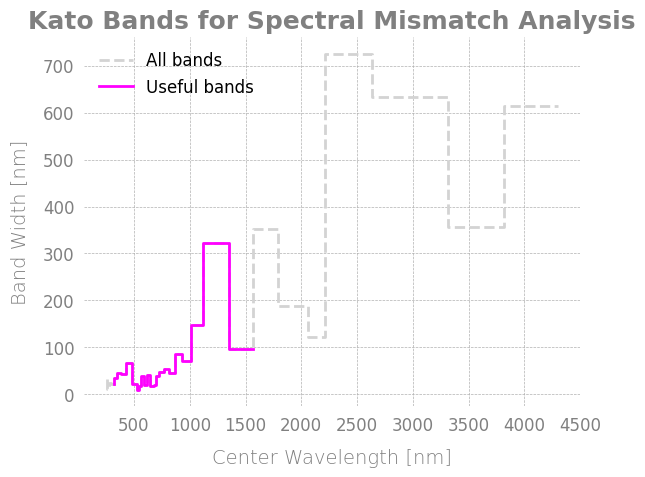

In [3]:
# print(f'> Plot the Kato bands : {DataFrame(KATO_BANDS)}')
print('> Plot the Kato bands')
plot_kato_bands()

# Reference Spectrum AM 1.5G

> Plot the Kato-integrated reference spectrum :                          317.5      345.5      385.5    430.0     485.0   \
Center [nm]                                                                
Irradiance [W/m^2/nm]  3.762075  16.831475  34.494375  55.5669  101.7898   

                         529.0    545.0   558.5    586.0     615.0   ...  \
Center [nm]                                                          ...   
Irradiance [W/m^2/nm]  33.56645  15.2264  25.754  55.9699  29.05095  ...   

                         694.0     723.5     767.0    817.5   866.5    932.0   \
Center [nm]                                                                     
Irradiance [W/m^2/nm]  24.97635  46.10605  51.86105  52.4744   42.78  47.3538   

                         1010.5   1120.0   1355.0   1564.5  
Center [nm]                                                 
Irradiance [W/m^2/nm]  49.58725  61.2562  68.0498  24.6898  

[1 rows x 22 columns]


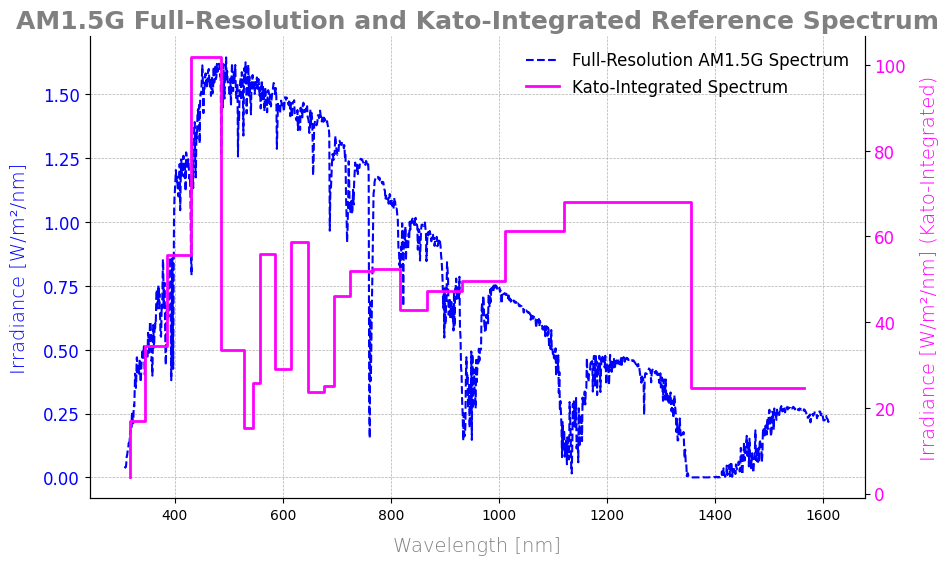

In [4]:
reference_spectrum = read_csv("AM1.5G_iec60904-3_ed4.asr", index_col=0)
# reference_spectrum = DataFrame(get_reference_spectra()['global']) * 100
reference_spectrum.index.name = 'Wavelength [nm]'  # Set the index name if needed

kato_integrated_reference_spectrum = read_csv(reference_spectrum_kato_integrated_filename).set_index(
    CENTER_COLUMN_NAME  # Maybe better use the band-centers ?
)
kato_integrated_reference_spectrum.columns = kato_integrated_reference_spectrum.T.index.astype(float)

print(f'> Plot the Kato-integrated reference spectrum : {kato_integrated_reference_spectrum}')
plot_referenced_spectra(
    reference_spectrum=reference_spectrum,
    referrer_spectrum=kato_integrated_reference_spectrum,
)

# Responsivity

> Plot the Kato-integrated spectral responsivity data :                317.5     345.5     385.5     430.0     485.0     529.0   \
Center [nm]                                                               
polySi       0.072083  0.127974  0.181624  0.252432  0.327652  0.384245   
FS6          0.138953  0.218968  0.267762  0.305373  0.352157  0.386653   
FS3          0.000000  0.030743  0.239595  0.325548  0.481176  0.699163   
monoSi       0.087083  0.151876  0.210301  0.275273  0.343452  0.395582   
aSi          0.203200  0.471931  0.780291  0.965207  0.922699  0.725391   
CIGS         0.000000  0.000398  0.063108  0.310342  0.462389  0.598606   
cSi          0.042297  0.152285  0.222461  0.286871  0.347120  0.388763   

               545.0     558.5     586.0     615.0   ...    694.0     723.5   \
Center [nm]                                          ...                       
polySi       0.403000  0.418206  0.446526  0.474438  ...  0.543110  0.566800   
FS6          0.398527  0.408

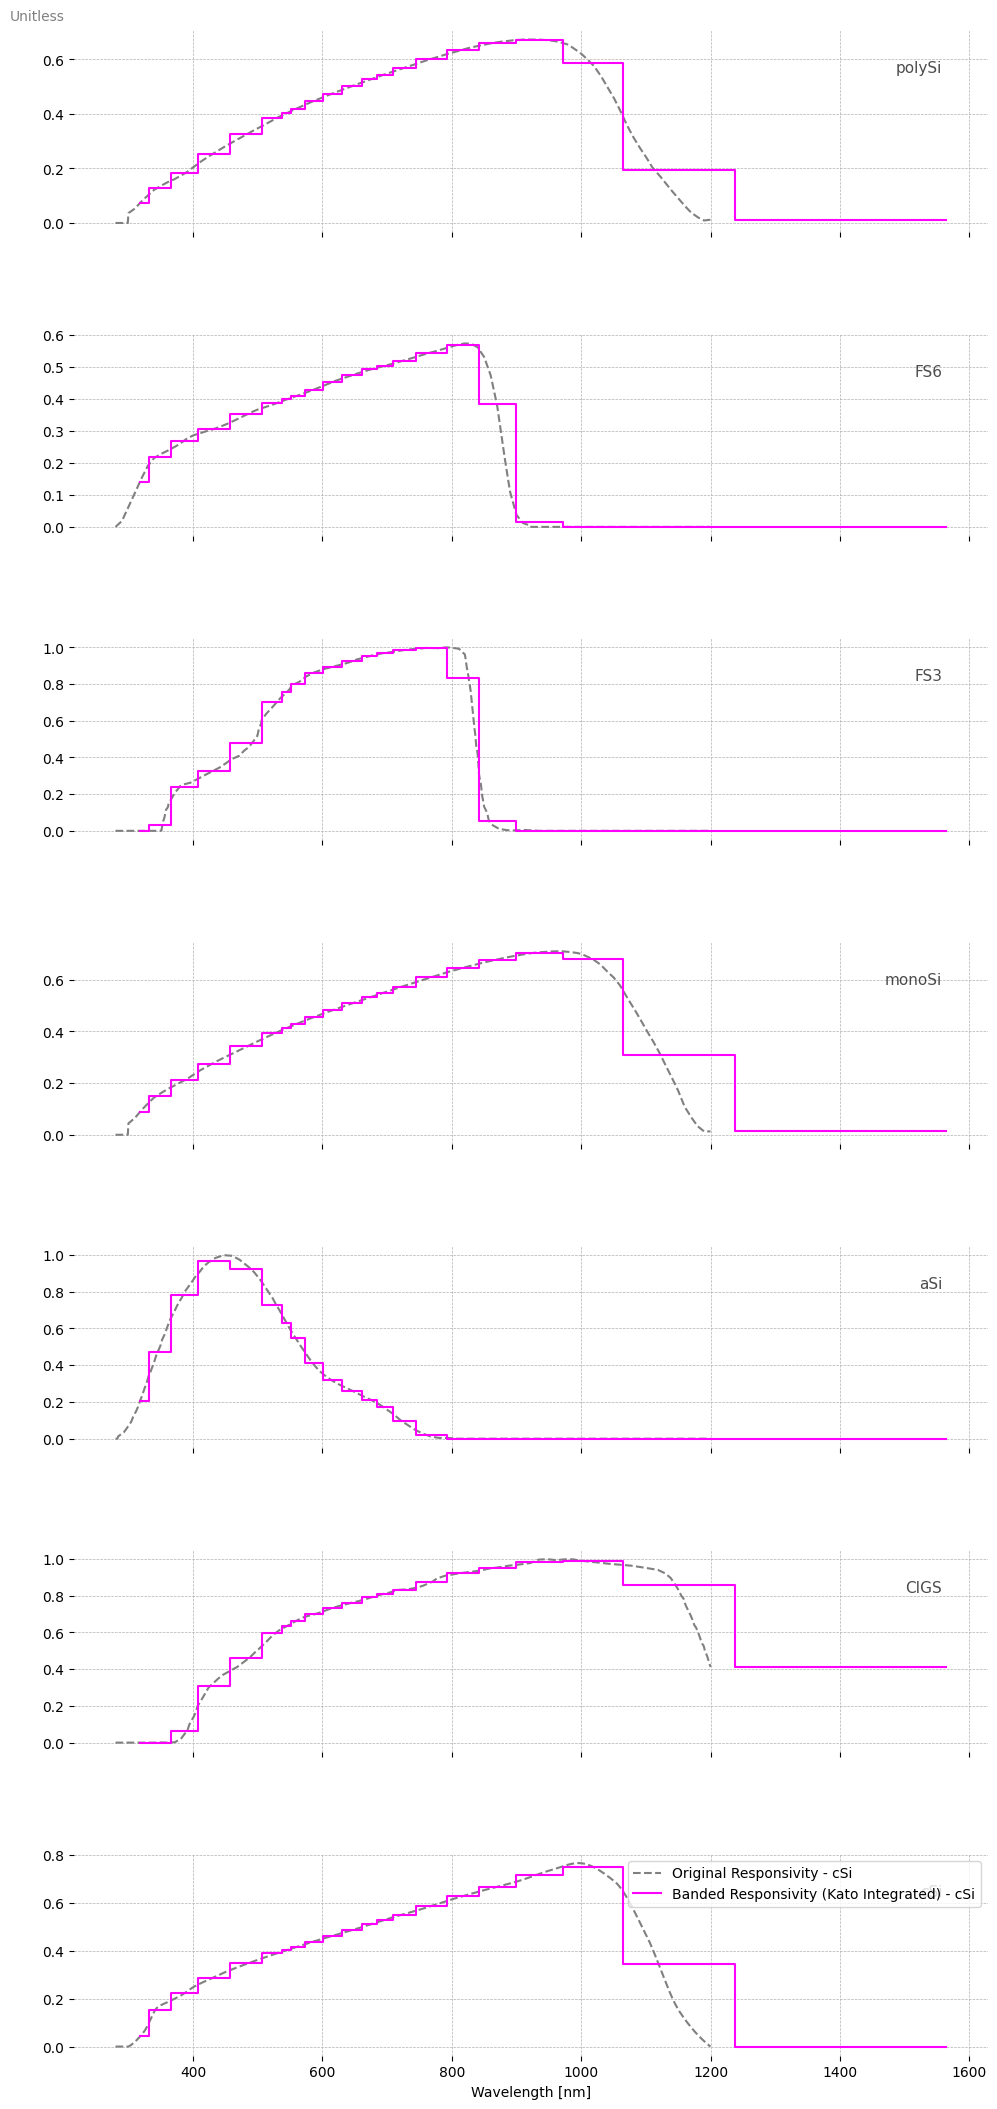

In [5]:
responsivity = read_csv(responsivity_filename).set_index('Wavelength [nm]')
responsivity_kato_integrated = read_csv(responsivity_kato_integrated_filename).set_index(CENTER_COLUMN_NAME)
responsivity_kato_integrated.columns = responsivity_kato_integrated.T.index.astype(float)

print(f'> Plot the Kato-integrated spectral responsivity data : {responsivity_kato_integrated}')
plot_spectral_responsivity(responsivity=responsivity,
                           responsivity_kato_integrated=responsivity_kato_integrated,
                          )

# Irradiance measured via .. SARAH3 (or another source ?)

> Plot the spectrally resolved irradiance data :                      317.5   345.5   385.5   430.0   485.0   529.0   545.0   \
Datetime                                                                      
2018-06-01 00:10:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-06-01 00:40:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-06-01 01:10:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-06-01 01:40:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-06-01 02:10:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                     ...     ...     ...     ...     ...     ...     ...   
2019-06-30 21:40:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2019-06-30 22:10:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2019-06-30 22:40:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2019-06-30 23:10:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
201

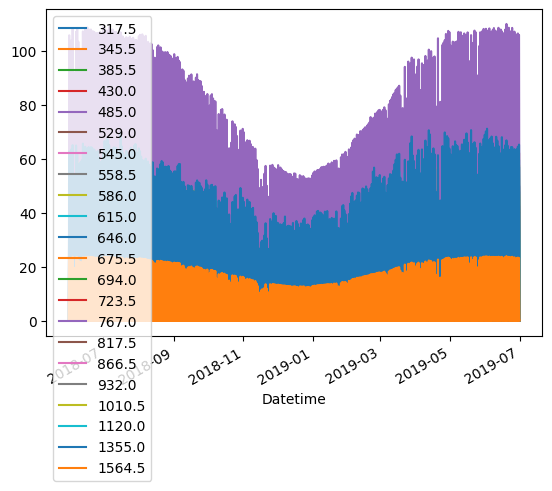

In [6]:
irradiance = read_csv(sarah3_sri_almeria_filename, index_col=0, parse_dates=True, dtype=float)
irradiance.columns = irradiance.columns.astype(float)
irradiance_filtered = irradiance.loc[
    :, (irradiance.columns > WAVELENGTH_MIN) & (irradiance.columns < WAVELENGTH_MAX)
]

print(f'> Plot the spectrally resolved irradiance data : {irradiance_filtered}')
irradiance_filtered.plot(label="Irradiance")
plt.legend()
plt.show()

# Calculate effective irradiance

> Plot the effective irradiance : PV Technology       polySi                                                   \
Wavelength          317.5  345.5  385.5  430.0  485.0  529.0  545.0  558.5    
Datetime                                                                      
2018-06-01 00:10:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-06-01 00:40:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-06-01 01:10:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-06-01 01:40:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-06-01 02:10:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2019-06-30 21:40:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2019-06-30 22:10:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2019-06-30 22:40:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2019-06-30 23:10:0

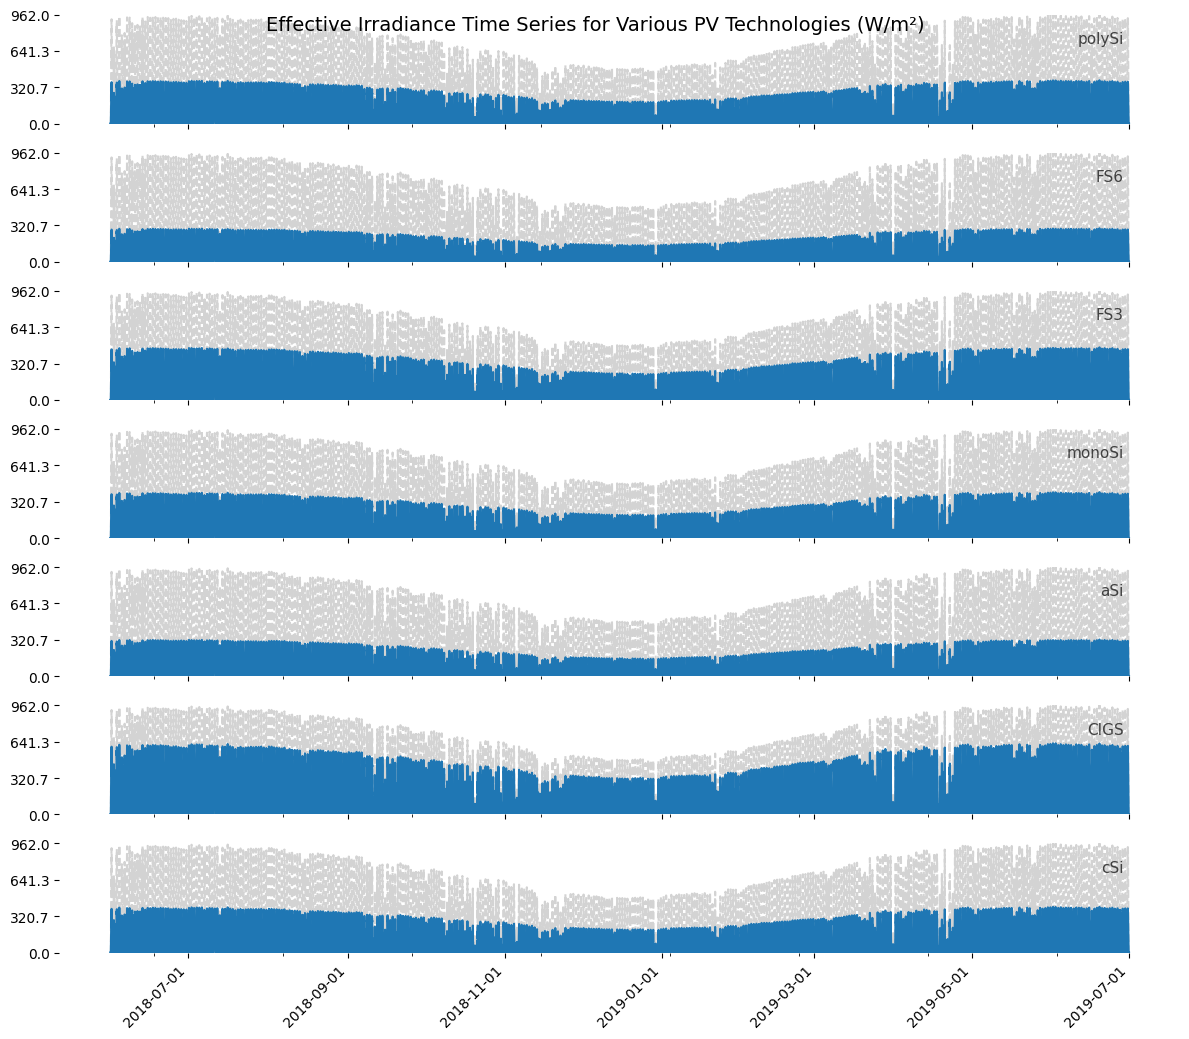

In [7]:
effective_irradiance = calculate_effective_irradiance(
    responsivity=responsivity_kato_integrated,
    irradiance=irradiance_filtered,
)

print(f'> Plot the effective irradiance : {effective_irradiance}')
plot_effective_irradiance(
    responsivity=responsivity_kato_integrated,
    irradiance=irradiance_filtered,
    effective_irradiance=effective_irradiance,
)

# Useful fraction of the global horizontal irradiance

> Plot the useful effective irradiance fraction Inputs : Datetime
2018-06-01 00:10:00    0.0
2018-06-01 00:40:00    0.0
2018-06-01 01:10:00    0.0
2018-06-01 01:40:00    0.0
2018-06-01 02:10:00    0.0
                      ... 
2019-06-30 21:40:00    0.0
2019-06-30 22:10:00    0.0
2019-06-30 22:40:00    0.0
2019-06-30 23:10:00    0.0
2019-06-30 23:40:00    0.0
Length: 18887, dtype: float64 Effective : Datetime
2018-06-01 00:10:00    0.0
2018-06-01 00:40:00    0.0
2018-06-01 01:10:00    0.0
2018-06-01 01:40:00    0.0
2018-06-01 02:10:00    0.0
                      ... 
2019-06-30 21:40:00    0.0
2019-06-30 22:10:00    0.0
2019-06-30 22:40:00    0.0
2019-06-30 23:10:00    0.0
2019-06-30 23:40:00    0.0
Length: 18887, dtype: float64 Useful fraction : Datetime
2018-06-01 00:10:00   NaN
2018-06-01 00:40:00   NaN
2018-06-01 01:10:00   NaN
2018-06-01 01:40:00   NaN
2018-06-01 02:10:00   NaN
                       ..
2019-06-30 21:40:00   NaN
2019-06-30 22:10:00   NaN
2019-06-30 22:40:00   Na

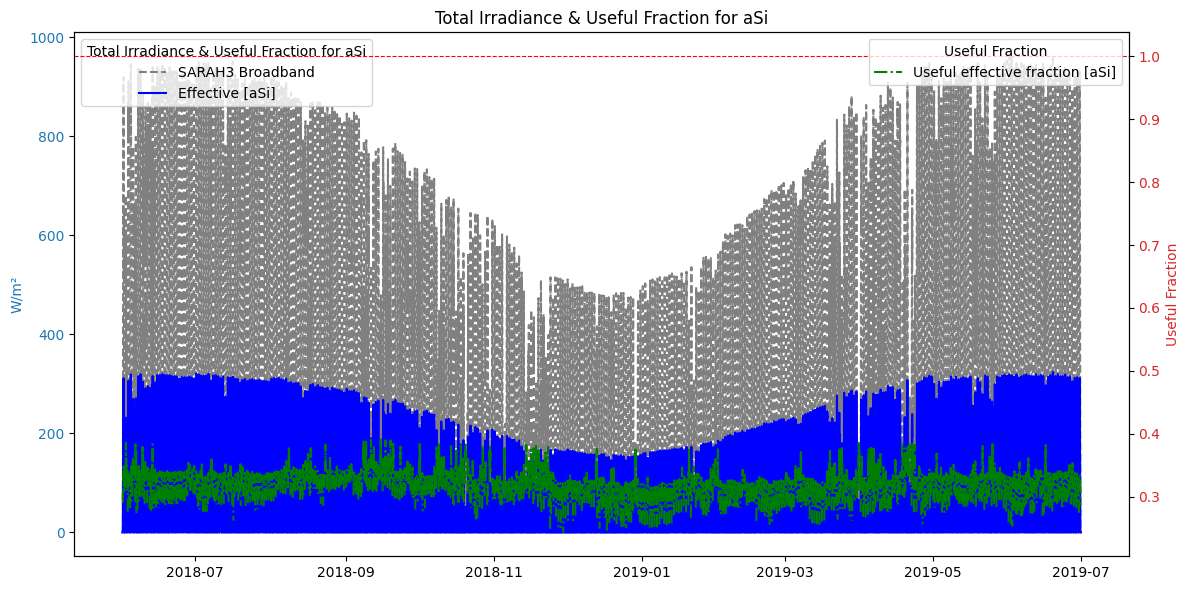

In [8]:
broadband_irradiance = irradiance_filtered.sum(
    axis=1
)  ## here : spectrally resolved SARAH3 global horizontal irradiance
broadband_effective_irradiance_aSi = effective_irradiance["aSi"].sum(
    axis=1
)  # Summing across wavelengths (columns)
useful_fraction_of_irradiance_aSi = (
    broadband_effective_irradiance_aSi / broadband_irradiance
)
assert (
    broadband_irradiance.shape
    == broadband_effective_irradiance_aSi.shape
    == useful_fraction_of_irradiance_aSi.shape
)

print(
    f"> Plot the useful effective irradiance fraction",
    f"Inputs : {broadband_irradiance}",
    f"Effective : {broadband_effective_irradiance_aSi}",
    f"Useful fraction : {useful_fraction_of_irradiance_aSi}",
)
plot_irradiance_data(
    broadband_irradiance,
    broadband_effective_irradiance_aSi,
    useful_fraction_of_irradiance_aSi,
    title="Total Irradiance & Useful Fraction for aSi",
    ylabel="W/m²",
    labels=[
        "SARAH3 Broadband",
        "Effective [aSi]",
        "Useful effective fraction [aSi]",
    ],
)

# Useful fraction based on the reference spectrum

In [9]:
broadband_reference_spectrum = kato_integrated_reference_spectrum.sum(axis=0)  # AM 1.5G
# convert reference spectrum to "time series" : repeat its values along time !
reference_spectrum_series = DataFrame(broadband_reference_spectrum).T
reference_spectrum_time_series = concat(
    [reference_spectrum_series] * len(broadband_effective_irradiance_aSi),
    ignore_index=True,
)
reference_spectrum_time_series.index = broadband_effective_irradiance_aSi.index
broadband_reference_spectrum_time_series = reference_spectrum_time_series.sum(axis=1)
useful_fraction_of_reference_spectrum_aSi = (
    broadband_effective_irradiance_aSi / broadband_reference_spectrum_time_series
)

## Plot reference spectrum data for SARAH3

> Plot the useful reference spectrum fraction Broadband : Datetime
2018-06-01 00:10:00    923.729225
2018-06-01 00:40:00    923.729225
2018-06-01 01:10:00    923.729225
2018-06-01 01:40:00    923.729225
2018-06-01 02:10:00    923.729225
                          ...    
2019-06-30 21:40:00    923.729225
2019-06-30 22:10:00    923.729225
2019-06-30 22:40:00    923.729225
2019-06-30 23:10:00    923.729225
2019-06-30 23:40:00    923.729225
Length: 18887, dtype: float64 Effective : Datetime
2018-06-01 00:10:00    0.0
2018-06-01 00:40:00    0.0
2018-06-01 01:10:00    0.0
2018-06-01 01:40:00    0.0
2018-06-01 02:10:00    0.0
                      ... 
2019-06-30 21:40:00    0.0
2019-06-30 22:10:00    0.0
2019-06-30 22:40:00    0.0
2019-06-30 23:10:00    0.0
2019-06-30 23:40:00    0.0
Length: 18887, dtype: float64 Useful fraction : Datetime
2018-06-01 00:10:00    0.0
2018-06-01 00:40:00    0.0
2018-06-01 01:10:00    0.0
2018-06-01 01:40:00    0.0
2018-06-01 02:10:00    0.0
                   

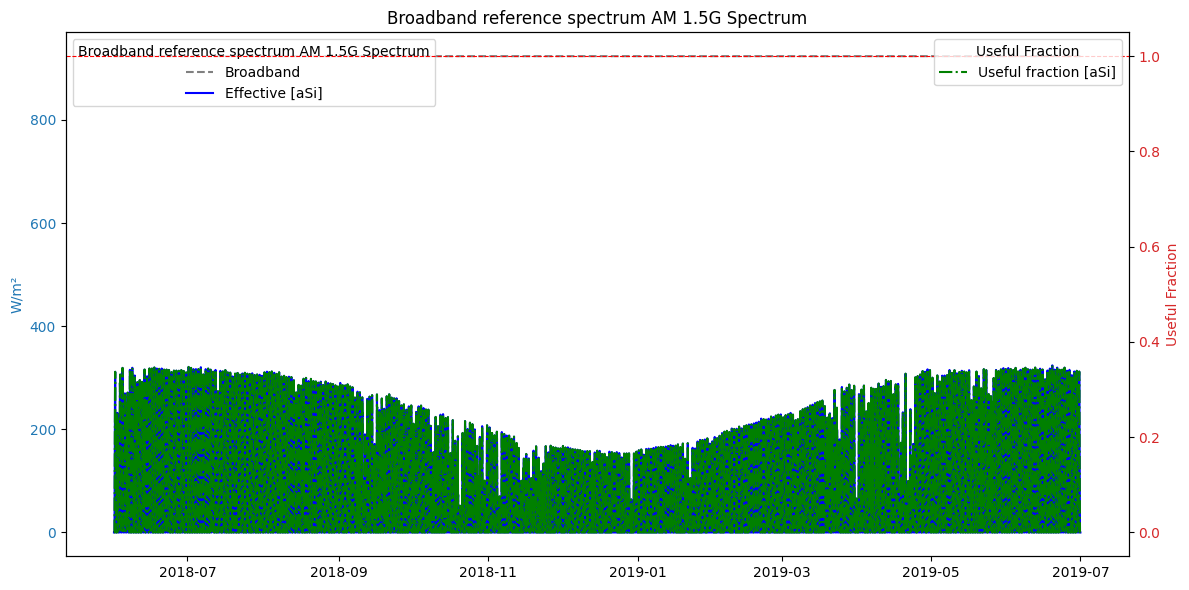

In [10]:
print(
    f"> Plot the useful reference spectrum fraction",
    f"Broadband : {broadband_reference_spectrum_time_series}",
    f"Effective : {broadband_effective_irradiance_aSi}",
    f"Useful fraction : {useful_fraction_of_reference_spectrum_aSi}",
)
plot_irradiance_data(
    broadband_reference_spectrum_time_series,
    broadband_effective_irradiance_aSi,
    useful_fraction_of_reference_spectrum_aSi,
    title="Broadband reference spectrum AM 1.5G Spectrum",
    ylabel="W/m²",
    labels=[
        "Broadband",
        "Effective [aSi]",
        "Useful fraction [aSi]",
    ],
)

# Mismatch

> Calculate the Spectral Mismatch  > Inputs :    > Irradiance :                      317.5   345.5   385.5   430.0   485.0   529.0   545.0   \
Datetime                                                                      
2018-06-01 00:10:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-06-01 00:40:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-06-01 01:10:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-06-01 01:40:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-06-01 02:10:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                     ...     ...     ...     ...     ...     ...     ...   
2019-06-30 21:40:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2019-06-30 22:10:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2019-06-30 22:40:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2019-06-30 23:10:00     0.0     0.0     0.0     0.0     0.0     0.0

/spacetime/pvgis/pvgis-prototype/.venv/lib/python3.11/site-packages/pvlib/spectrum/mismatch.py:346: RuntimeWarning: invalid value encountered in divide
  uf_sun = integrate(e_sun * sr_sun) / integrate(e_sun)
/spacetime/pvgis/pvgis-prototype/.venv/lib/python3.11/site-packages/pvlib/spectrum/mismatch.py:346: RuntimeWarning: invalid value encountered in divide
  uf_sun = integrate(e_sun * sr_sun) / integrate(e_sun)
/spacetime/pvgis/pvgis-prototype/.venv/lib/python3.11/site-packages/pvlib/spectrum/mismatch.py:346: RuntimeWarning: invalid value encountered in divide
  uf_sun = integrate(e_sun * sr_sun) / integrate(e_sun)
/spacetime/pvgis/pvgis-prototype/.venv/lib/python3.11/site-packages/pvlib/spectrum/mismatch.py:346: RuntimeWarning: invalid value encountered in divide
  uf_sun = integrate(e_sun * sr_sun) / integrate(e_sun)
/spacetime/pvgis/pvgis-prototype/.venv/lib/python3.11/site-packages/pvlib/spectrum/mismatch.py:346: RuntimeWarning: invalid value encountered in divide
  uf_sun = integ

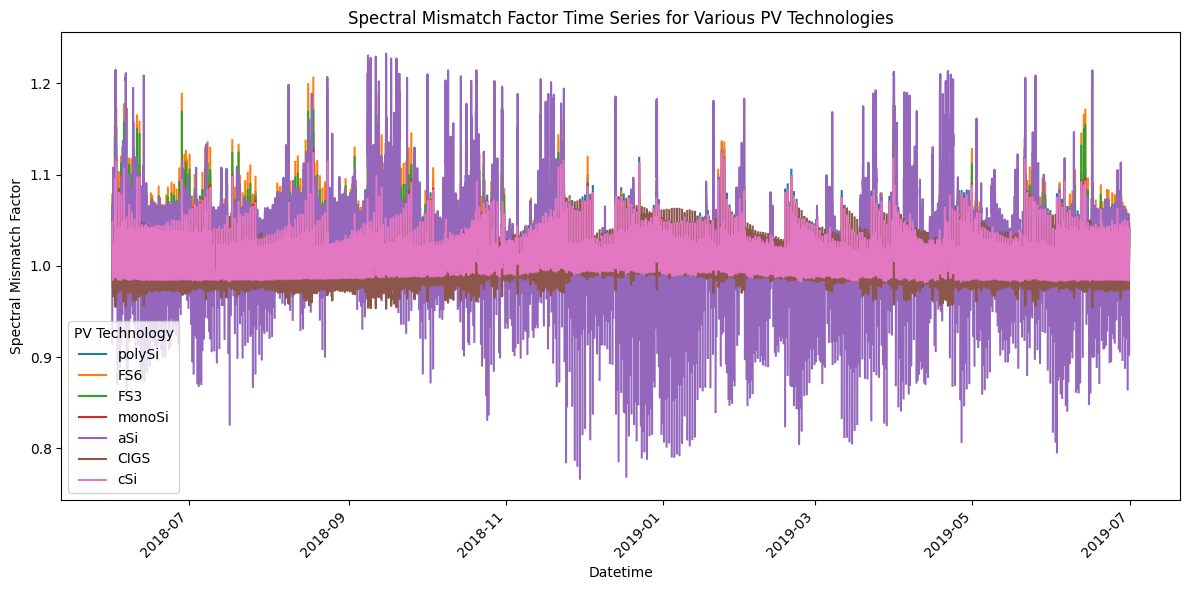

In [11]:
print(
        f"> Calculate the Spectral Mismatch"
        f"  > Inputs :"
        f"    > Irradiance : {irradiance}"
        f"    > Responsivity : {responsivity_kato_integrated}"
        f"    > Reference spectrum : {kato_integrated_reference_spectrum}"
)
spectral_mismatch = calculate_spectral_mismatch(
    irradiance=irradiance,
    responsivity=responsivity_kato_integrated,
    reference_spectrum=kato_integrated_reference_spectrum,
)
spectral_mismatch_pvlib = calculate_spectral_mismatch_pvlib(
    sr=responsivity_kato_integrated,
    e_sun=irradiance,
    e_ref=kato_integrated_reference_spectrum,
)

print(f"> Plot the spectral mismatch factor time series : {spectral_mismatch}")
plot_spectral_mismatch_dataframe(spectral_mismatch)

# Seaborn

## Violin Plot

  > Violin-Plot the spectral mismatch factor


/spacetime/pvgis/pvgis-prototype/gitignore/spectral_mismatch/examples/almeria/spectral_mismatch_violinplot.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


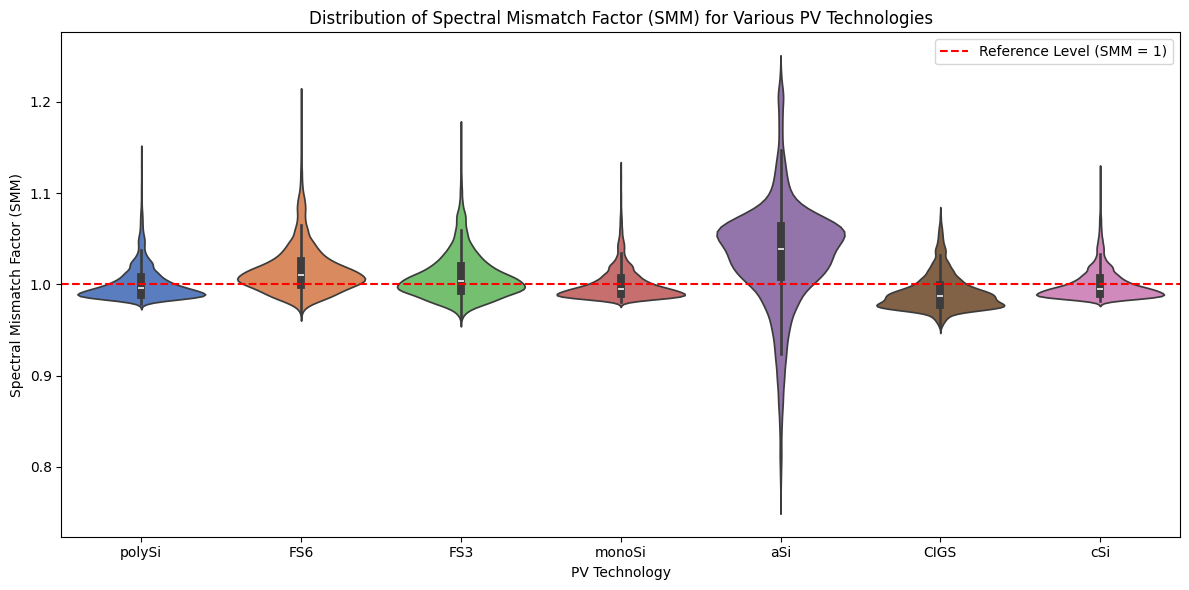

In [12]:
print("  > Violin-Plot the spectral mismatch factor")
violinplot_spectral_mismatch_dataframe(spectral_mismatch)

## Boxen Plot

  > Boxen-Plot the spectral mismatch factor


/spacetime/pvgis/pvgis-prototype/gitignore/spectral_mismatch/examples/almeria/spectral_mismatch_boxenplot.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="Photovoltaic Technology", y="Spectral Mismatch Factor", data=smm_melted, palette="muted")


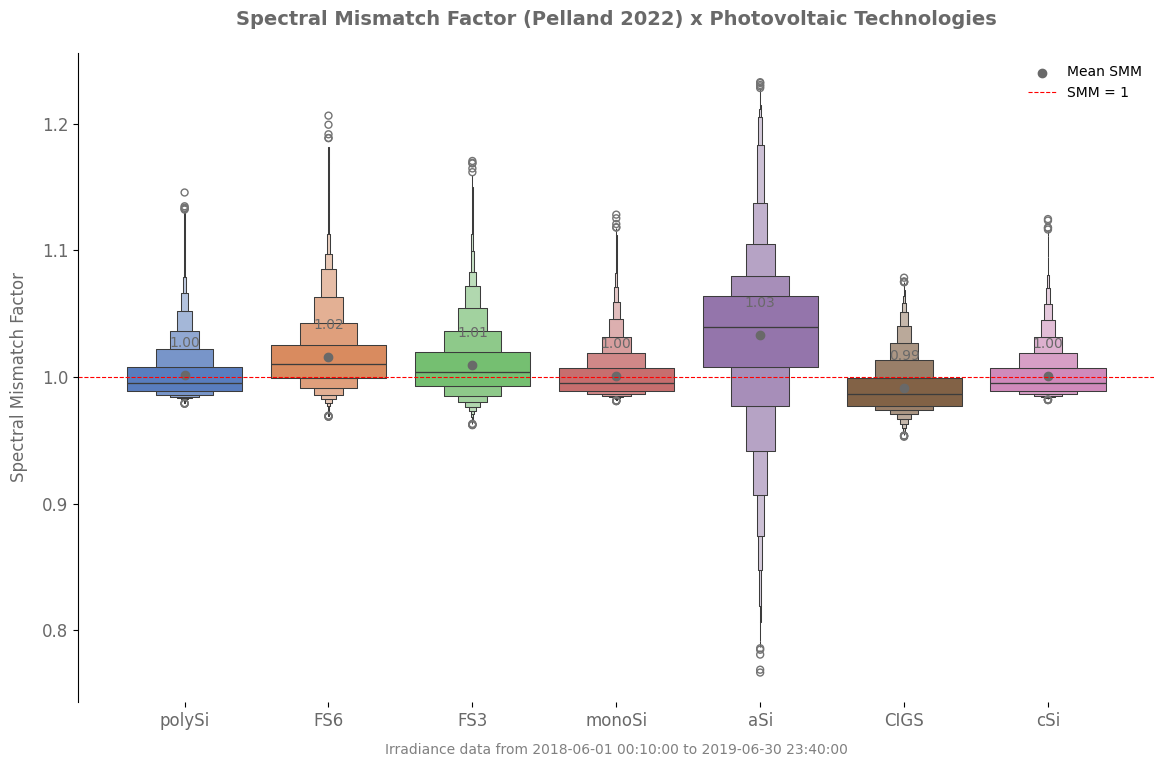

/spacetime/pvgis/pvgis-prototype/gitignore/spectral_mismatch/examples/almeria/spectral_mismatch_boxenplot.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="Photovoltaic Technology", y="Spectral Mismatch Factor", data=smm_melted, palette="muted")


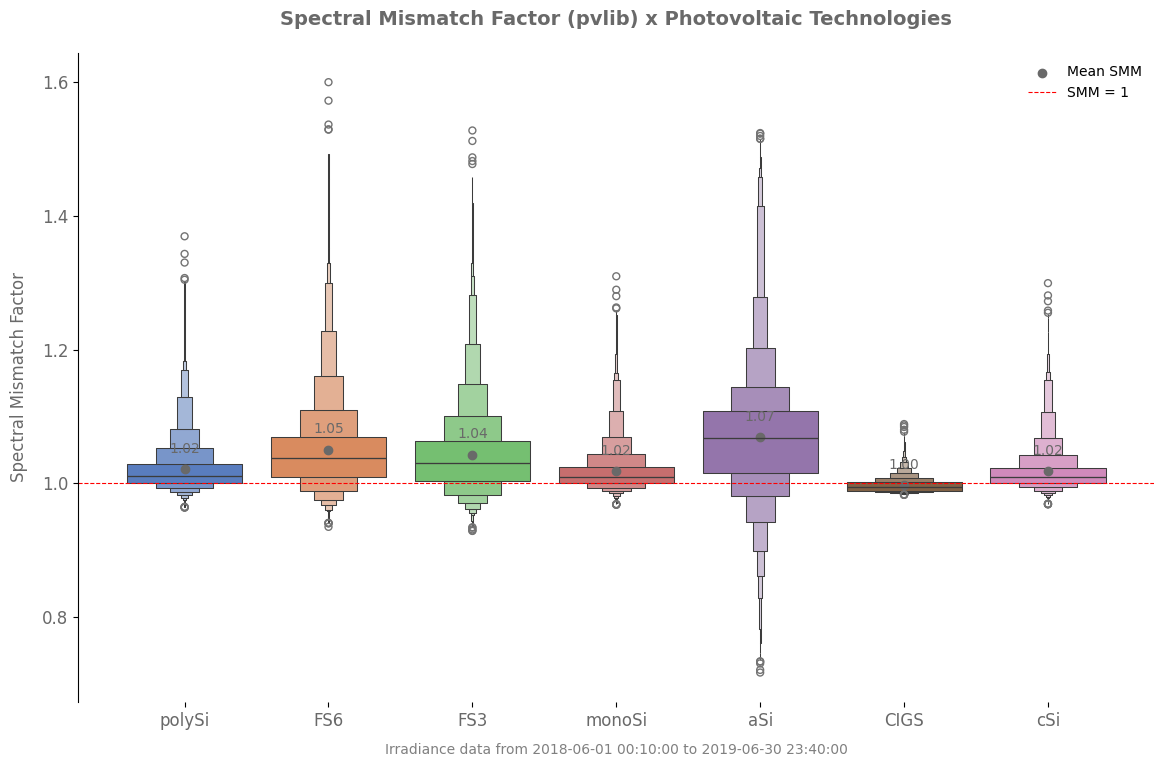

In [13]:
print("  > Boxen-Plot the spectral mismatch factor")
# boxenplot_spectral_mismatch_dataframe(spectral_mismatch)

boxenplot_spectral_mismatch_dataframe_x(
    spectral_mismatch=spectral_mismatch,
    spectral_mismatch_model='Pelland 2022',
)
boxenplot_spectral_mismatch_dataframe_x(
    spectral_mismatch=spectral_mismatch_pvlib,
    spectral_mismatch_model='pvlib',
)
# spectral_mismatch = calculate_spectral_mismatch_mihaylov(
#     irradiance=irradiance,
#     responsivity=responsivity,
#     reference_spectrum=reference_spectrum,
# )

### Compare

/spacetime/pvgis/pvgis-prototype/gitignore/spectral_mismatch/examples/almeria/spectral_mismatch_boxenplot.py:225: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxenplot(


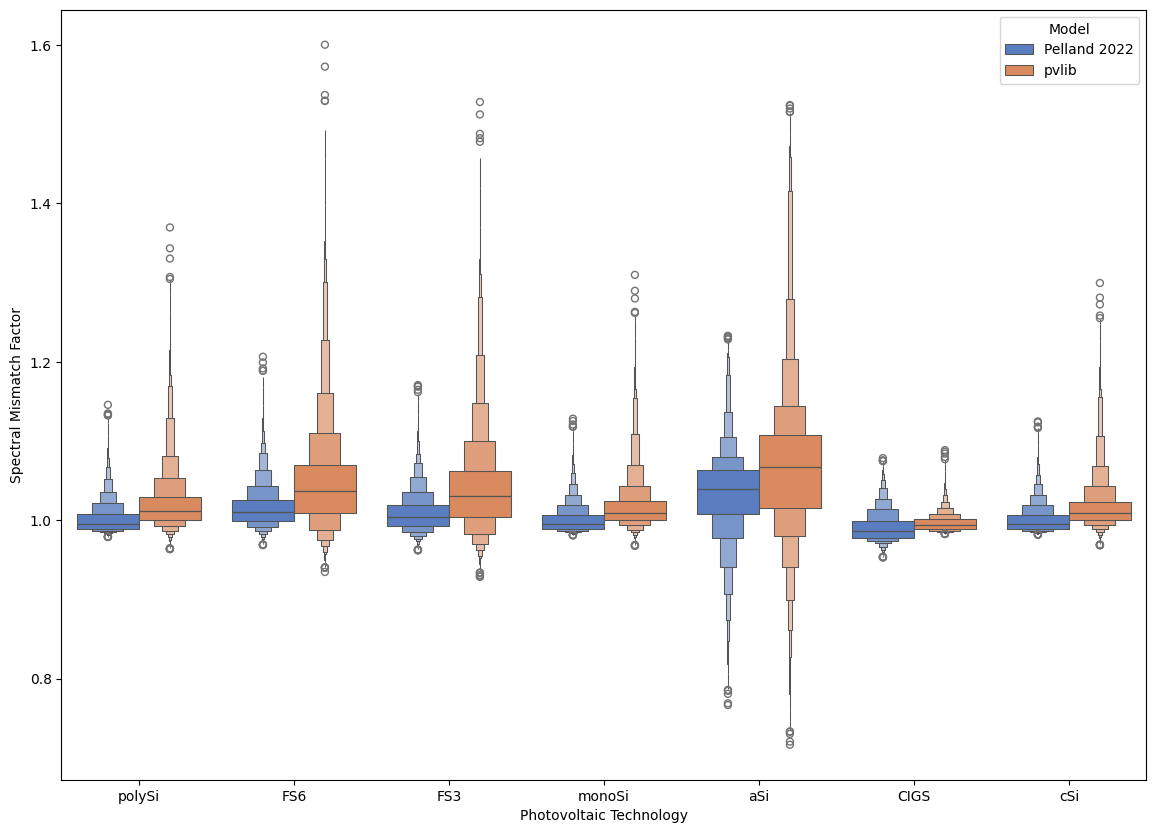

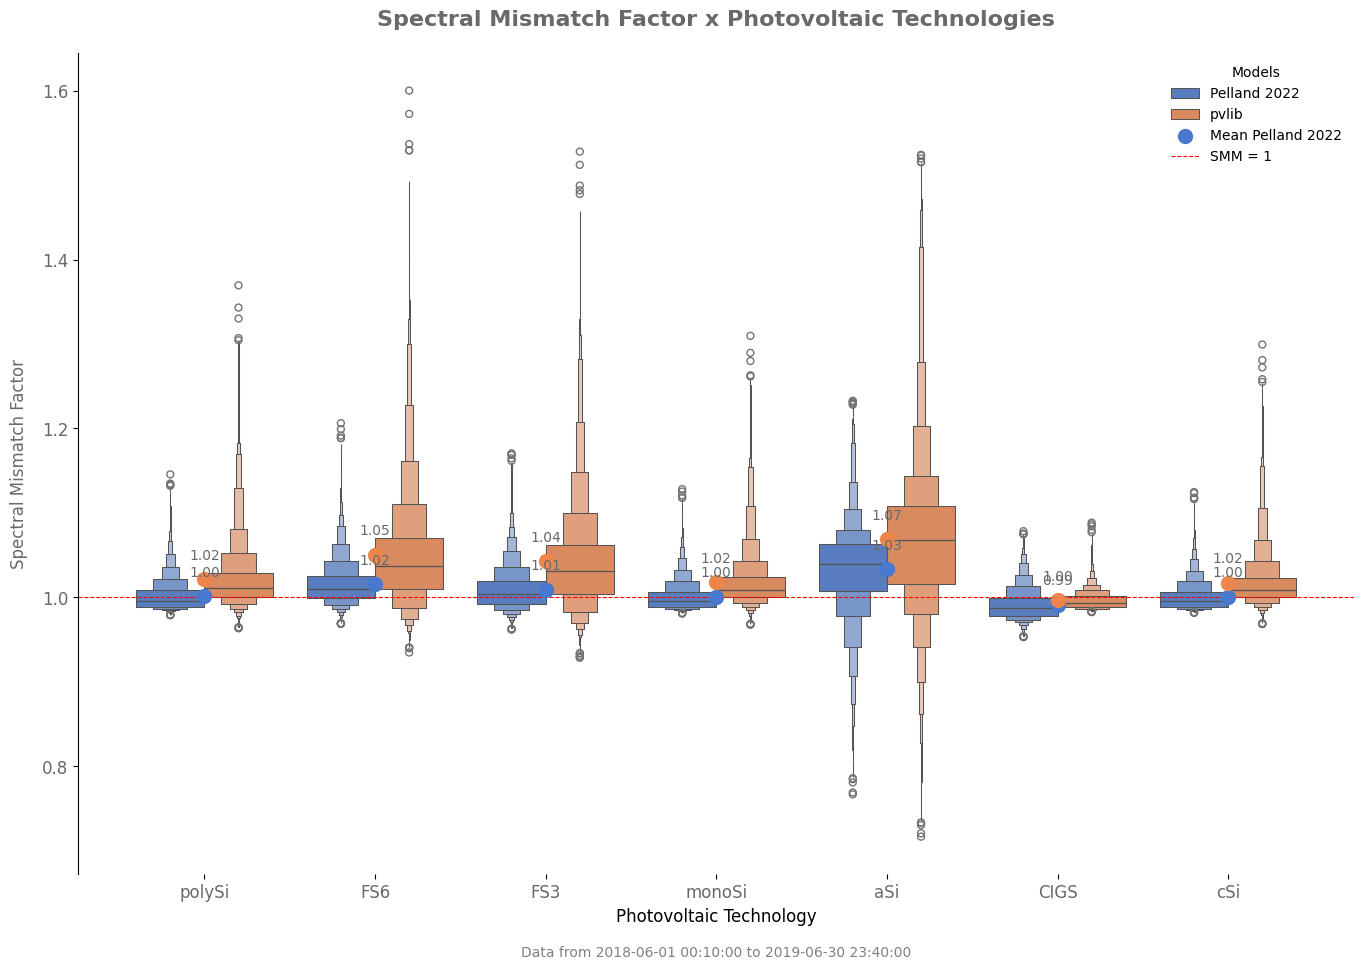

In [14]:
boxenplot_spectral_mismatch_comparison(
    spectral_mismatch_1=spectral_mismatch,
    model_name_1='Pelland 2022',
    spectral_mismatch_2=spectral_mismatch_pvlib,
    model_name_2='pvlib',
)